In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("airline_dec_2008_50k.csv", dtype='unicode')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         50000 non-null  object
 1   Year               50000 non-null  object
 2   Month              50000 non-null  object
 3   DayofMonth         50000 non-null  object
 4   DayOfWeek          50000 non-null  object
 5   DepTime            32968 non-null  object
 6   CRSDepTime         50000 non-null  object
 7   ArrTime            31418 non-null  object
 8   CRSArrTime         50000 non-null  object
 9   UniqueCarrier      50000 non-null  object
 10  FlightNum          50000 non-null  object
 11  TailNum            44556 non-null  object
 12  ActualElapsedTime  31367 non-null  object
 13  CRSElapsedTime     50000 non-null  object
 14  AirTime            31367 non-null  object
 15  ArrDelay           31367 non-null  object
 16  DepDelay           32968 non-null  objec

## Univariate Exploration

What is the disribution of the flights in December 200?

In [5]:
df.DayofMonth = pd.to_numeric(df.DayofMonth)
df.DayOfWeek = pd.to_numeric(df.DayOfWeek)
days = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']
df.DayNameOfWeek = df.DayOfWeek.apply(lambda x: days[x-1])

Text(0.5, 1.0, 'Flights distribution in December 2008')

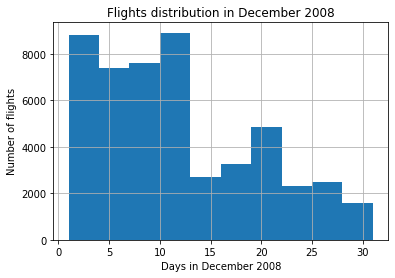

In [6]:
ax = df.DayofMonth.hist();
ax.set_ylabel("Number of flights")
ax.set_xlabel("Days in December 2008")
ax.set_title("Flights distribution in December 2008");

__Observation:__ It's visible that there are more flights in the first half of the month and there are less flights in the Christmas season.

What is the disribution of the flights across the week?

Text(0.5, 1.0, 'Flights distribution in a week')

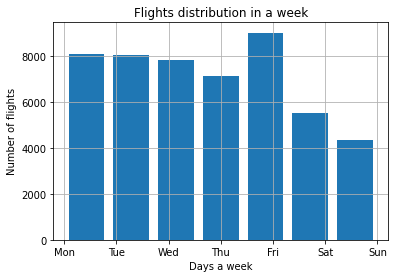

In [7]:
ax = df.DayNameOfWeek.hist(rwidth=0.8, bins=7);
ax.set_ylabel("Number of flights")
ax.set_xlabel("Days a week")
ax.set_title("Flights distribution in a week");

__Observation:__ It's visible that there are less flights on the weekends (Sat and Sun). Friday is the most day that has flights.

How many flights are delayed compared to the non-delayed?

In [8]:
df['Delayed'] = df.ArrDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df.Delayed.unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Delayed vs non delayed flights')

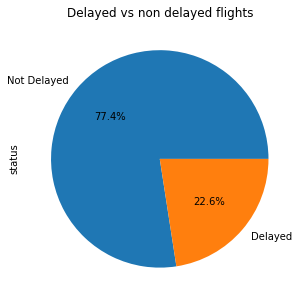

In [9]:
flights = pd.DataFrame({
    'status': 
    [
        df.shape[0] - df['Delayed'].sum(),
        df['Delayed'].sum()
    ]
},
index= ['Not Delayed', 'Delayed'])
ax = flights.plot(kind="pie",y='status', figsize=(5,5), autopct='%1.1f%%', legend=False)
ax.set_title("Delayed vs non delayed flights");

__Observation:__ Almost one fourth of the flights are delayed

## Bivariate Exploration

What are the top 10 airports that are home to more delays?

In [10]:
df2 = df.groupby('Dest')['Delayed'].sum().reset_index()
df2.head()

Dest  Delayed
0  ABE        8
1  ABI        0
2  ABQ       48
3  ABY        0
4  ACT        0

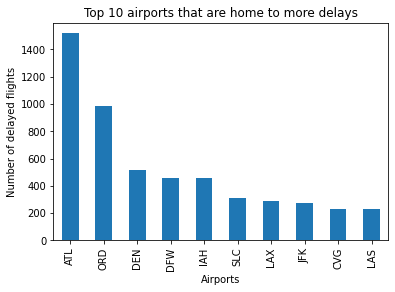

In [11]:
top10 = df2.sort_values(by=['Delayed'], ascending=False).head(10)
ax = top10.plot(kind="bar", x='Dest', y ='Delayed', legend=False);
ax.set_ylabel("Number of delayed flights")
ax.set_xlabel("Airports")
ax.set_title("Top 10 airports that are home to more delays");

__Observation:__ Top city that have delays is atlanta airport, followed by Chicago O'Hare International Airport, and Denver International Airport. The #3 airport appears to have less than half Atlanta's airport.

How are the flights distributed per carrier?

In [13]:
df3 = df.groupby('UniqueCarrier')['Delayed'].sum().reset_index().sort_values(by=['Delayed'], ascending=False)
df3.head()

UniqueCarrier  Delayed
16            WN     1701
13            OO     1180
10            MQ     1027
5             DL     1025
6             EV      782

Text(0.5, 1.0, 'Flights delay per carrier')

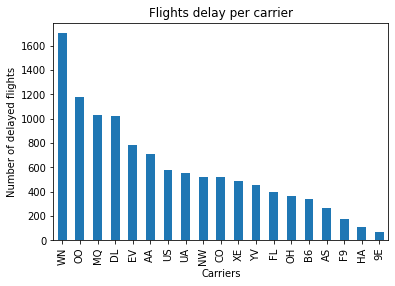

In [14]:
ax = df3.plot(kind="bar", x='UniqueCarrier', y ='Delayed', legend=False);
ax.set_ylabel("Number of delayed flights")
ax.set_xlabel("Carriers")
ax.set_title("Flights delay per carrier");

__Observation:__ WN(Southwest Airlines) and OO(SKYWEST) are the most 2 carriers that had delays. Starting from carrier #5, the total flights per carrier decreases to half of WV.

Is there a relation between the flight distances and flight delay?

Text(0.5, 1.0, 'Flights delays w.r.t flight distances')

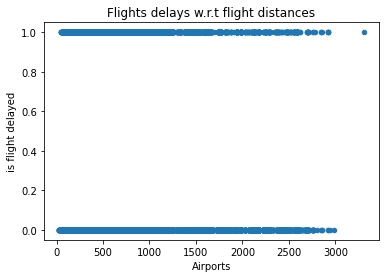

In [ ]:
df.Distance = pd.to_numeric(df.Distance)
ax = df.plot.scatter(x='Distance', y='Delayed', legend=False)
ax.set_ylabel("is flight delayed")
ax.set_xlabel("Airports")
ax.set_title("Flights delays w.r.t flight distances");

__Observation:__ There is no relation between flights delay and the flight distances.

## Multivariate Exploration

How the delay reasons affect the flights delay?

In [ ]:
df['isCarrierDelayed'] = df.CarrierDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df['isWeatherDelayed'] = df.WeatherDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df['isNASDelayed'] = df.NASDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df['isSecurityDelayed'] = df.SecurityDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)
df['isLateAircraftDelayed'] = df.LateAircraftDelay.apply(lambda x: 1 if not pd.isna(x) and int(x) > 0 else 0)

In [ ]:
delays = pd.DataFrame({
    'numberOfDelays': 
    [
        df['isCarrierDelayed'].sum(),
        df['isWeatherDelayed'].sum(),
        df['isNASDelayed'].sum(),
        df['isSecurityDelayed'].sum(),
        df['isLateAircraftDelayed'].sum(),
    ]
},
index= ['carrier delay', 'weather delay', 'NAS delay', 'security delay','late aircraft delay'])

Text(0.5, 1.0, 'Delay reasons')

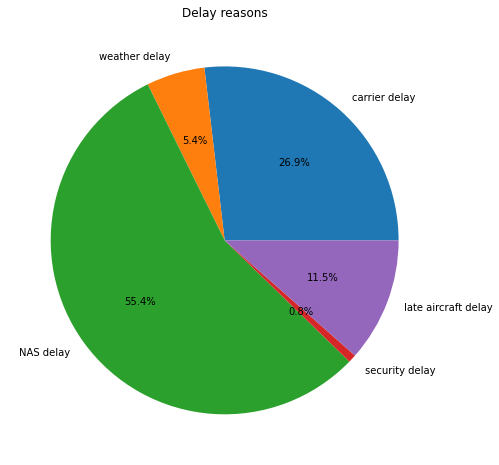

In [ ]:
ax = delays.plot(kind="pie", y='numberOfDelays', figsize=(11,8), autopct='%1.1f%%', legend=False)
ax.set_ylabel("")
ax.set_title("Delay reasons");

__Observation:__ NAS delay is the top reason for flights to be delayed. 55.4% of the delays were NAS delays and 26.9% of the delays were the carrier's responsibility.

Which routes have more delays?

In [ ]:
delayedRoutes = df.groupby(['Origin', 'Dest'])['Delayed'].sum().reset_index().sort_values(by=['Delayed'], ascending=False).head(70)
delayedRoutes.head()

Origin Dest  Delayed
1883    LGA  ORD       40
1079    DTW  ORD       40
371     BOS  JFK       40
1180    EWR  ORD       39
374     BOS  LGA       36

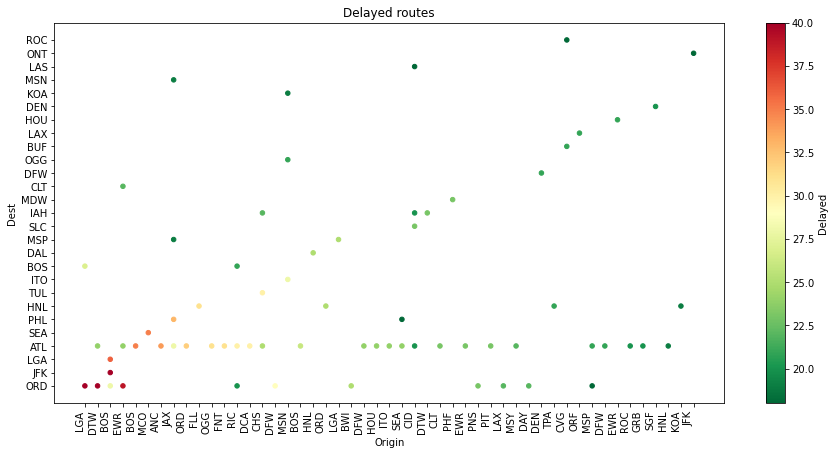

In [ ]:
fig, ax = plt.subplots()
delayedRoutes.plot.scatter(x="Origin", y="Dest", c="Delayed", figsize=(15,7), cmap='RdYlGn_r',  ax=ax)
ax.set_xticklabels(delayedRoutes['Origin'], rotation=90, ha='right');
ax.set_title("Delayed routes");

__Observations:__ LGA-ORD, DTW-ORD, BOS-JFK are the most delayed routes.

Which routes have more cancellations?

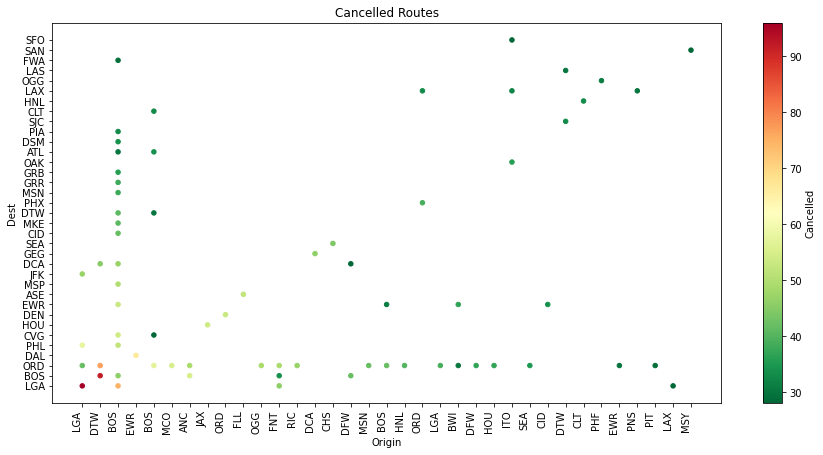

In [ ]:
df.Cancelled = pd.to_numeric(df.Cancelled);
cancelledRoutes = df.groupby(['Origin', 'Dest'])['Cancelled'].sum().reset_index().sort_values(by=['Cancelled'], ascending=False).head(70)
fig, ax = plt.subplots()
cancelledRoutes.plot.scatter(x="Origin", y="Dest", c="Cancelled", figsize=(15,7), cmap='RdYlGn_r',  ax=ax)
ax.set_xticklabels(delayedRoutes['Origin'], rotation=90, ha='right');
ax.set_title("Cancelled Routes");

__Observations:__ BOS-LGA, LGA-BOS, LGA-ORD are the routes that have the most of the cancellations.

## Conclusion

We studied the flights in December. We found that more flights in December are before the Christmas season. Moreover, most of the flights are on Friday before the weekend. Furthermore, we studied the flights delay. Almost, 25% of the flights are delayed in December. Most of the delays are becuase of NAS (delay that is within the control of the National Airspace System) and carrier delays.